### Access Token

850691721474195457-IQ6fJEhdeanGekAjes8ISwB2et8QtqW

### Access Token Secret

zfYzjiJiMD5UBQEsH4MkMCOUqjAn5LeojZNbpfxWDtc5K

### API Key

SjhZRBJxuS2StmRqHiwQTU0uR

### API Key Secret

EMLdfKnbD8yHWcaCi0gsFgbjbyWH9GPyRgoBgNsJpybyDP16vM

### Bearer Token

AAAAAAAAAAAAAAAAAAAAANKxlgEAAAAAT1aLhS8oW0t2jJRm6v4jLDj%2BLMs%3DSsvX3nw9P5yhtP1x5U5x1DIg6ZQH6xd9828zDdRjlUvVQAhClK

In [1]:
pip install tweepy pandas nltk textblob matplotlib wordcloud

  Using cached oauthlib-3.2.2-py3-none-any.whl.metadata (7.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 804.8 kB/s eta 0:00:001m700.9 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 888.7 kB/s eta 0:00:000:00:010:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 609.8 kB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 797.3 kB/s eta 0:00:00m eta 0:00:010:00:01
Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1
Note: you may need to restart the kernel to use updated packages.


In [19]:
import tweepy
import pandas as pd
import time


In [9]:
# Twitter API credentials (Replace with your keys)
API_KEY = "SjhZRBJxuS2StmRqHiwQTU0uR"
API_SECRET = "EMLdfKnbD8yHWcaCi0gsFgbjbyWH9GPyRgoBgNsJpybyDP16vM"
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAANKxlgEAAAAAT1aLhS8oW0t2jJRm6v4jLDj%2BLMs%3DSsvX3nw9P5yhtP1x5U5x1DIg6ZQH6xd9828zDdRjlUvVQAhClK"
ACCESS_TOKEN = "850691721474195457-IQ6fJEhdeanGekAjes8ISwB2et8QtqW"
ACCESS_SECRET = "EMLdfKnbD8yHWcaCi0gsFgbjbyWH9GPyRgoBgNsJpybyDP16vM"

In [10]:
# Authenticate using Tweepy Client (v2 API)
client = tweepy.Client(bearer_token=BEARER_TOKEN)


In [17]:
# Function to fetch tweets with rate limit handling
def fetch_tweets_v2(query, count=10):
    try:
        tweets = client.search_recent_tweets(query=query, max_results=count, tweet_fields=["created_at", "text"])
        tweet_list = [[tweet.created_at, tweet.text] for tweet in tweets.data] if tweets.data else []
        return pd.DataFrame(tweet_list, columns=["Timestamp", "Tweet"])
    except tweepy.TooManyRequests:
        print("Rate limit exceeded. Waiting for 15 minutes...")
        time.sleep(900)  # Wait 15 minutes before retrying
        return fetch_tweets_v2(query, count)

In [21]:
# Fetch tweets
df = fetch_tweets_v2("William Ruto -is:retweet", count=10)
print(df.head())

Rate limit exceeded. Waiting for 15 minutes...
                  Timestamp                                              Tweet
0 2025-03-10 11:32:21+00:00  Madaxweyne William Ruto ayaa si rasmi ah u daa...
1 2025-03-10 11:32:12+00:00  Sina ubaya Lakini mbona Ivi sasa Kairo . Ama K...
2 2025-03-10 11:32:08+00:00  Musangalire!!! 😆😁😆😁 Muli mwoyo! Muli bhalamu!!...
3 2025-03-10 11:31:28+00:00  Going forward, this will be President William ...
4 2025-03-10 11:31:22+00:00  Wee watu waliamua je huko Eastleigh. Kutoa Rut...


In [15]:
auth = tweepy.OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, retry_count=3, retry_delay=5)


In [23]:
# Save tweets to CSV
df.to_csv("ruto_tweets.csv", index=False)

In [24]:
from textblob import TextBlob
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download("punkt")

[nltk_data] Downloading package punkt to /home/topister/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
# Function to analyze sentiment
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

In [26]:
# Apply sentiment analysis
df["Sentiment"] = df["Tweet"].apply(analyze_sentiment)

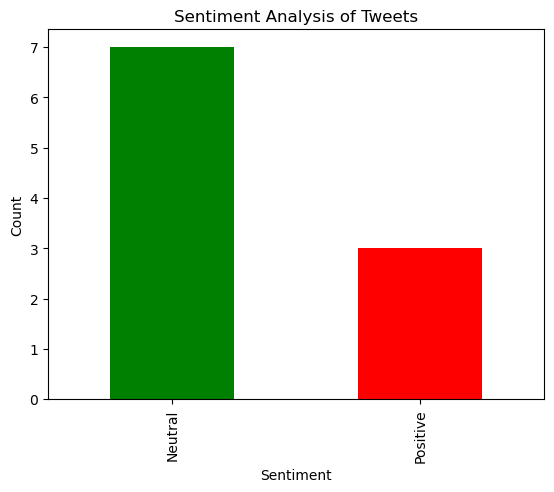

In [27]:
# Display sentiment distribution
df["Sentiment"].value_counts().plot(kind="bar", color=["green", "red", "gray"])
plt.title("Sentiment Analysis of Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

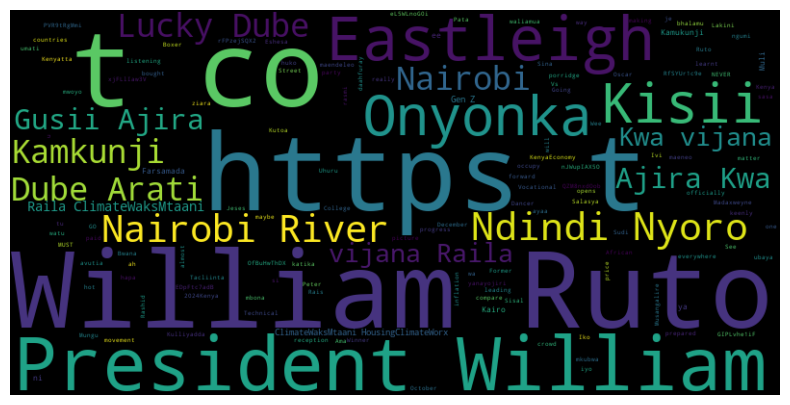

In [28]:
# Generate a word cloud of common words
text = " ".join(tweet for tweet in df["Tweet"])
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()